In [73]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Importing dataset

In [74]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [75]:
adult_data_set = pd.DataFrame(adult.data.features)
adult_data_set['income'] = adult.data.targets
adult_data_set

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [76]:
adult_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Checking for null values and counting the number of null values

In [77]:
adult_data_set.isna().sum()


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

### Getting the mode of below columns 

In [78]:
mode_value_of_workclass = adult_data_set['workclass'].mode()
mode_value_of_occupation = adult_data_set['occupation'].mode()
mode_value_of_native_countries = adult_data_set['native-country'].mode()
print()
print(mode_value_of_workclass)
print()
print(mode_value_of_occupation)
print()
print(mode_value_of_native_countries)
print()


0    Private
Name: workclass, dtype: object

0    Prof-specialty
Name: occupation, dtype: object

0    United-States
Name: native-country, dtype: object



In [79]:
# replacing all null values in workclass from private since it is the mode in workclasss
adult_data_set['workclass'].fillna('Private', inplace=True)

C:\Users\deela\AppData\Local\Temp\ipykernel_2500\3033094980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data_set['workclass'].fillna('Private', inplace=True)


In [80]:
# replacing all null values in occupation from Prof-specialty since it is the mode in occupation
adult_data_set['occupation'].fillna('Prof-specialty', inplace=True)

C:\Users\deela\AppData\Local\Temp\ipykernel_2500\92794098.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data_set['occupation'].fillna('Prof-specialty', inplace=True)


In [81]:
# replacing all null values in native-country from United-States since it is the mode in native-country
adult_data_set['native-country'].fillna('United-States', inplace=True)

C:\Users\deela\AppData\Local\Temp\ipykernel_2500\2448138822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data_set['native-country'].fillna('United-States', inplace=True)


In [82]:
# make sure there's no null values 
adult_data_set.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [83]:
# iterating over each column and checking for unique values
for column in adult_data_set.columns:
  unique_values = adult_data_set[column].unique()
  print(f"{column} unique values")
  print(unique_values)
  print('\n')

age unique values
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass unique values
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


fnlwgt unique values
[ 77516  83311 215646 ... 173449  89686 350977]


education unique values
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


education-num unique values
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status unique values
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation unique values
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 

### Remove punctautions mark from income column rows

In [84]:

adult_data_set['income'] = adult_data_set['income'].str.replace('.', '')

### Checking for "?" values

In [85]:

# axis=0, operation will be applied vertically, row-wise
adult_data_set.isin(["?"]).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [86]:
# removing ? from columns
for column in ['native-country','occupation','workclass']:
  # inplace =True, changes are applied to the dataframe without creating a new frame
  # .index,  accesses the index labels of the rows
  adult_data_set.drop(adult_data_set[adult_data_set[column] == '?'].index, inplace=True)
  print(adult_data_set[column].unique())

['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy'
 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan'
 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France'
 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


### Checking for 0 in column

In [87]:

adult_data_set.isin([0]).sum(axis=0)

age                   0
workclass             0
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation            0
relationship          0
race                  0
sex                   0
capital-gain      42582
capital-loss      44253
hours-per-week        0
native-country        0
income                0
dtype: int64

In [88]:
# # calculating the average of capital-loss without considering zeros and replacing zeros by average
# # First, filter out the rows with capital-loss not equal to 0
# non_zero_capital_loss = adult_data_set[adult_data_set["capital-loss"] != 0]

# # Then calculate the mean of non-zero capital-loss
# mean_capital_loss = non_zero_capital_loss["capital-loss"].mean()

# # Formatting the mean with two decimal places
# formatted_mean_capital_loss = "{:.2f}".format(mean_capital_loss)

# # Print the result
# print(f"{formatted_mean_capital_loss} is the mean of capital loss excluding zero values.")

# # Replace zero values in the "capital-loss" column with the formatted mean capital loss
# # .loc will select row of capital-loss
# adult_data_set.loc[adult_data_set["capital-loss"] == 0, "capital-loss"] = formatted_mean_capital_loss

In [89]:
# # calculating the average of capital-gain without considering zeros and replacing zeros by average
# # First, filter out the rows with capital-gain not equal to 0
# non_zero_capital_gain = adult_data_set[adult_data_set["capital-gain"] != 0]

# # Then calculate the mean of non-zero capital-gain
# mean_capital_gain = non_zero_capital_gain["capital-gain"].mean()

# # Formatting the mean with two decimal places
# formatted_mean_capital_gain = "{:.2f}".format(mean_capital_gain)

# # Print the result
# print(f"{formatted_mean_capital_gain} is the mean of capital gain excluding zero values.")

# # Replace zero values in the "capital-gain" column with the formatted mean capital gain
# adult_data_set.loc[adult_data_set["capital-gain"] == 0, "capital-gain"] = formatted_mean_capital_gain

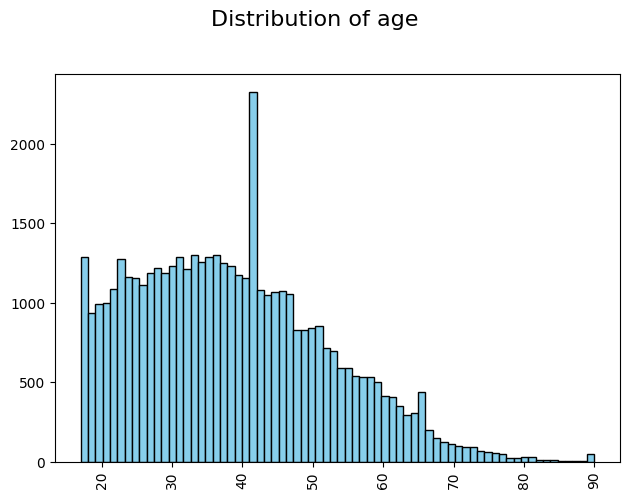

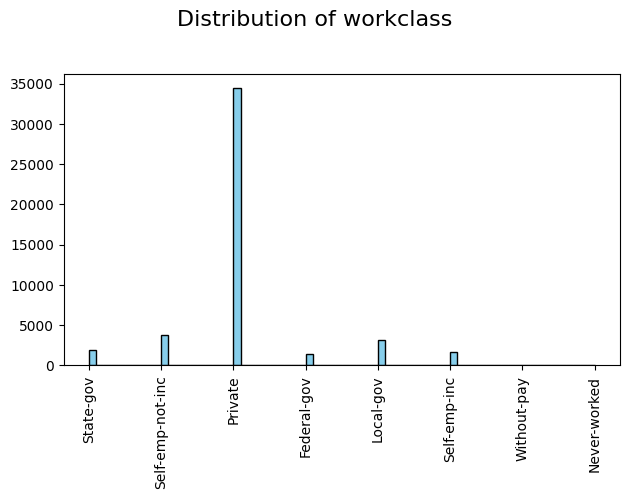

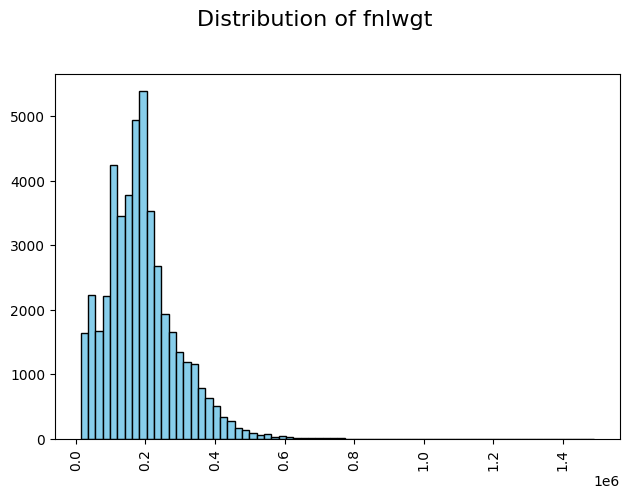

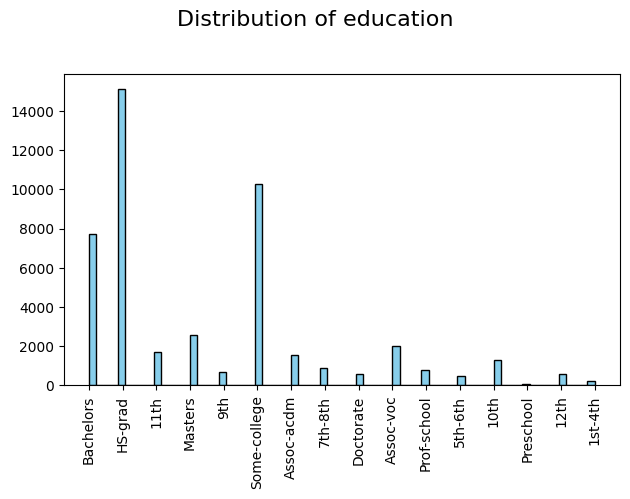

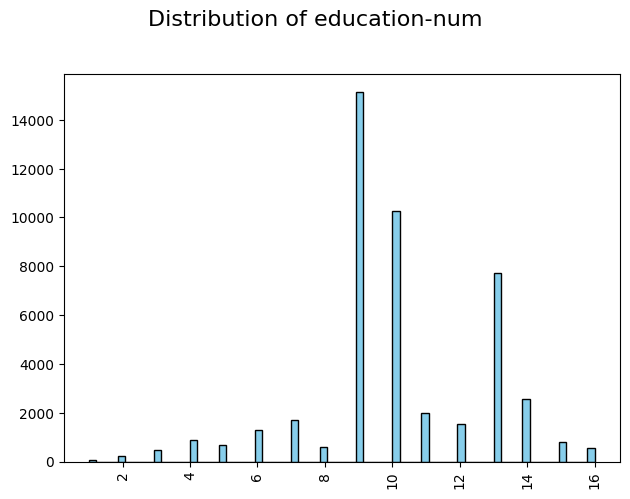

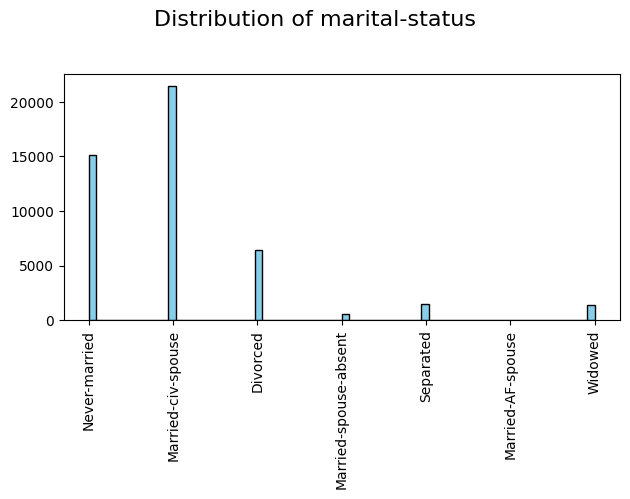

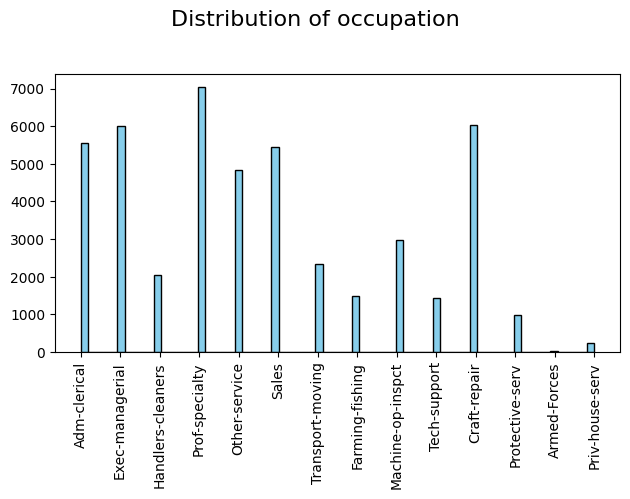

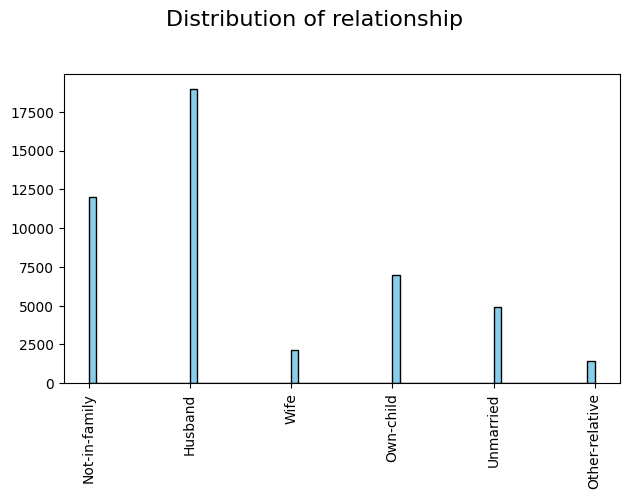

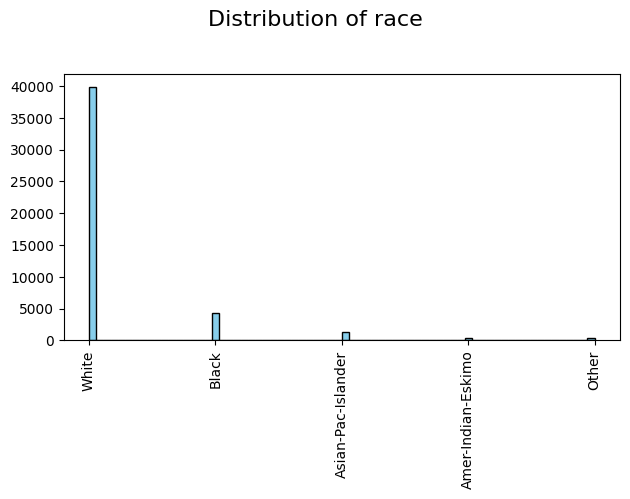

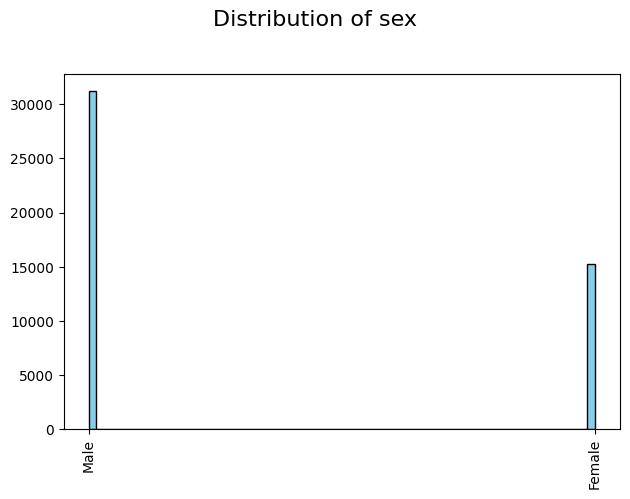

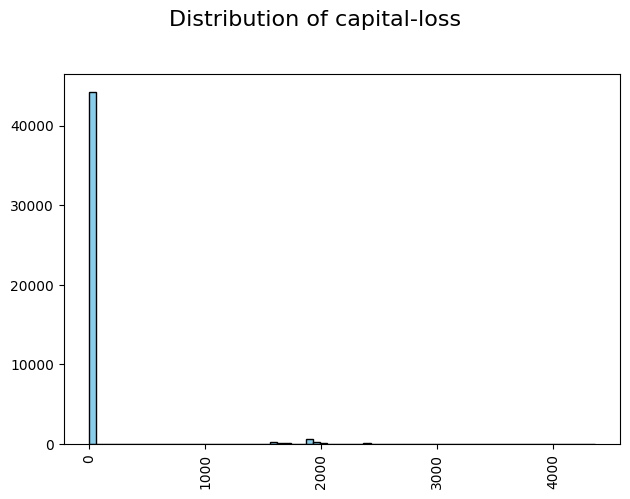

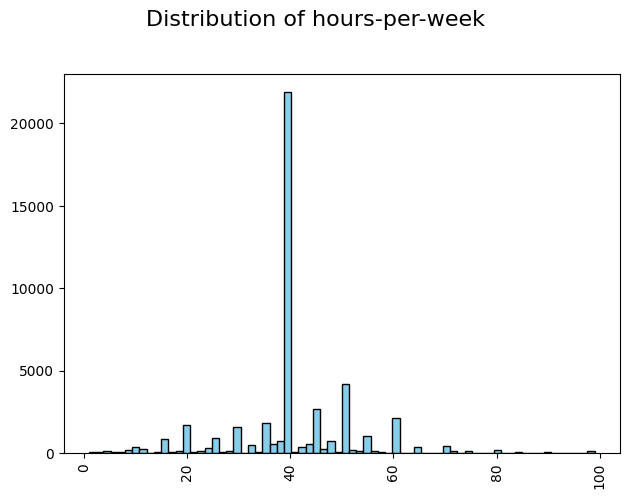

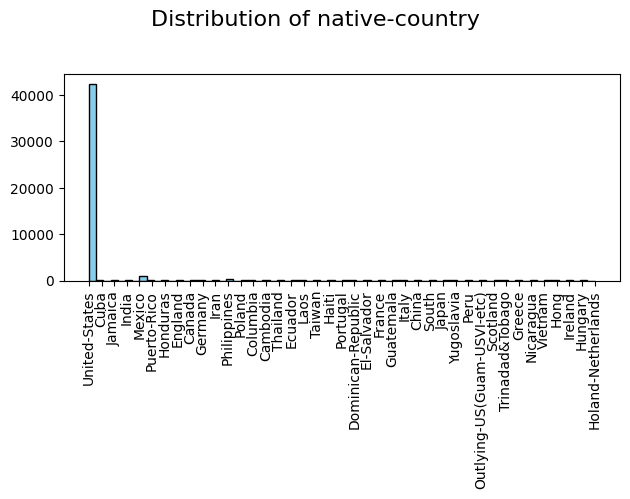

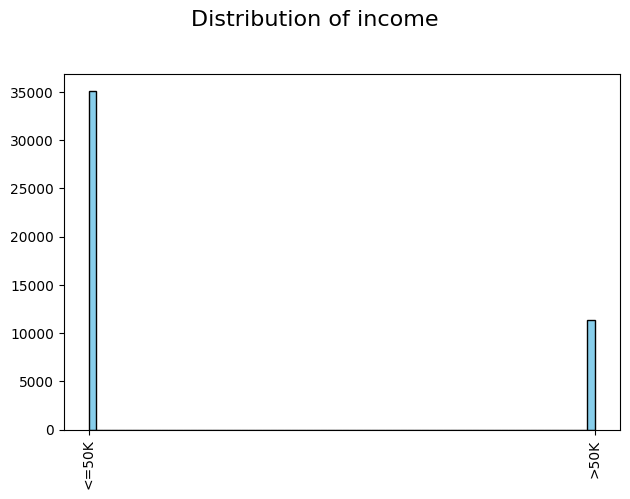

In [90]:
# Loop through each column
for column in ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-loss', 'hours-per-week', 'native-country', 'income']:
    # Plot histogram for the current column
    adult_data_set[column].hist(bins=70, color='skyblue', edgecolor='black', grid=False)

    # Rotate x-axis labels by 90 degrees
    plt.xticks(rotation=90)
    
    # Set title
    plt.suptitle('Distribution of ' + column, y=1.03, fontsize=16)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plot
    plt.show()

In [91]:
# Check for duplicate rows
duplicate_rows = adult_data_set.duplicated()

# Check if any duplicates exist
if duplicate_rows.any():
    print("The DataFrame contains duplicate rows.")
else:
    print("The DataFrame does not contain any duplicate rows.")

The DataFrame contains duplicate rows.


In [92]:
# Remove duplicate rows considering all columns
adult_data_set = adult_data_set.drop_duplicates()

# Check if any duplicates exist in the cleaned DataFrame
if adult_data_set.duplicated().any():
    print("The DataFrame still contains duplicate rows.")
else:
    print("The DataFrame does not contain any duplicate rows.")

The DataFrame does not contain any duplicate rows.


In [93]:
adult_data_set

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


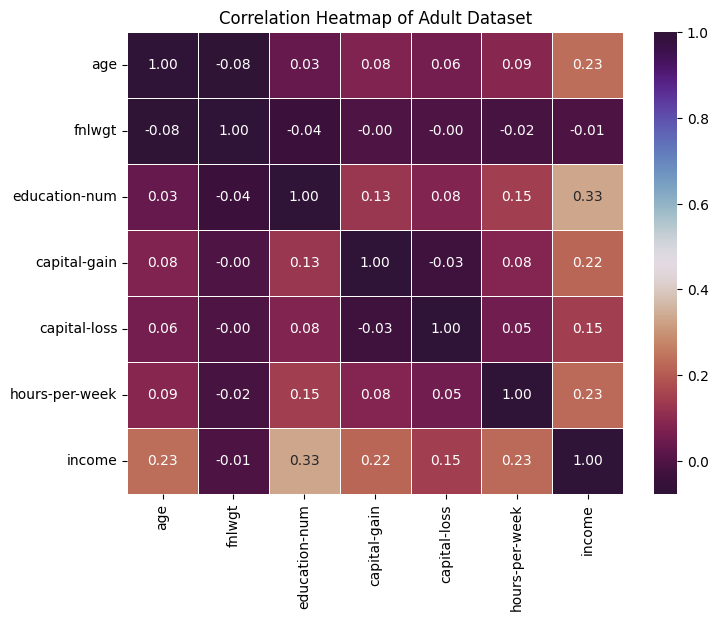

In [94]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original DataFrame
data_label_encoded = adult_data_set.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'income' column
data_label_encoded['income'] = label_encoder.fit_transform(adult_data_set['income'])

# Select numeric columns from the adult_data_set
numeric_adult_data_set = adult_data_set.select_dtypes(include='number')

# Concatenate the 'income' column with the numeric_adult_data_set DataFrame
numeric_adult_data_set_with_income = pd.concat([numeric_adult_data_set, data_label_encoded['income']], axis=1)

# Calculate the correlation matrix
corrmat = numeric_adult_data_set_with_income.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(corrmat, annot=True, cmap='twilight_shifted_r', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Adult Dataset')
plt.show()


### Droping the column fnlwgt, since it is irrelavant with income column 


In [95]:
adult_data_set.drop(columns=['fnlwgt'], inplace=True)

C:\Users\deela\AppData\Local\Temp\ipykernel_2500\1690225604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_data_set.drop(columns=['fnlwgt'], inplace=True)


In [104]:
label_encoder = LabelEncoder()
adult_data_set_label_encoded = adult_data_set.copy()  # Make a copy of the original DataFrame
columns_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','income']

for col in columns_to_encode:
    adult_data_set_label_encoded[col] = label_encoder.fit_transform(adult_data_set[col])

# View the encoded DataFrame
adult_data_set_label_encoded

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,9,13,0,9,1,4,0,0,0,36,38,0
48838,64,3,11,9,6,9,2,2,1,0,0,40,38,0
48839,38,3,9,13,2,9,0,4,1,0,0,50,38,0
48840,44,3,9,13,0,0,3,1,1,5455,0,40,38,0


### Checking for outliers using Boxplot

In [97]:
# # Select numerical columns for boxplot visualization
# numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# # Create boxplots for numerical columns
# plt.figure(figsize=(10, 6))
# adult_data_set[numerical_columns].boxplot()
# plt.title('Boxplots of Numerical Columns')
# plt.xlabel('Feature')
# plt.ylabel('Value')
# plt.xticks(rotation=45)
# plt.show()

### Winasorization to handle outliers in the dataset

In [98]:
# # Define the winsorization function
# def winsorize_column(column, lower_percentile=0.05, upper_percentile=0.95):
#     lower_limit = np.percentile(column, lower_percentile)
#     upper_limit = np.percentile(column, upper_percentile)
#     return np.where(column < lower_limit, lower_limit,
#                     np.where(column > upper_limit, upper_limit, column))
# adult_data_set['fnlwgt'] = winsorize_column(adult_data_set['fnlwgt'])

### Scaling dataset - Feature scaling 

In [100]:
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform()
# scaled_data

### Split the data among training and testing sets

In [105]:
# Split the dataset into features (X) and target variable (y)
X = adult_data_set_label_encoded.drop('income', axis=1)  # Features (all columns except the target column)
y = adult_data_set_label_encoded['income']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train contain the features and target variable for the training set, respectively,
# while X_test and y_test contain the features and target variable for the testing set, respectively.


### Import Naïve Bayes classifier

In [108]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.801379458993426


### Import Random Forest classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Initialize the Random Forest Classifier
# n_estimators specifies the number of decision tress that will be create in the random forest, increasing the number trees will increase the accracy of the prediction
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier using the training data
rf_classifier.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8450264037072961
